In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# HYPOTHESIS: Students who consume more alcohol, are less successful at school!

# Students who take math course
mat_students = pd.read_csv('student-mat.csv', delimiter = ';')
# Students who take portuguese course
por_students = pd.read_csv('student-por.csv', delimiter = ';')
# Add course before combining, so that we don't lose who takes which one.
# NOT USED: it was decided no to be used.
mat_students['course'] = 'Math' 
por_students['course'] = 'Portuguese'
# UNION of both sets
students = mat_students.append(por_students, ignore_index = True)

In [2]:
# Make a new column "Talc" (total alcohol consumption) which is sum of weekend and weekday consumption
students['Talc']  = students[['Walc','Dalc']].apply(lambda row: row['Walc'] + row['Dalc'], axis = 1)
# Make a new column "GA" (grade average) which is average grade
students['GA'] = students[['G1','G2','G3']].apply(lambda row: (row['G1'] + row['G2'] + row['G3']) / 3, axis = 1)
# Galc <= group total alcohol consumption into 3, more meaningful levels (see: 'labels')
students['Galc'] = pd.cut(students.Talc, [0, 3, 7, 10], labels=['low', 'medium', 'high'])
# Make sex variable type category
students['sex'] = students['sex'].astype('category')
# Final data set with only relevant columns
students = students[['studytime', 'GA', 'Talc', 'sex', 'freetime', 'Galc']]
# ---- DATA DISCOVERY STARTS HERE ----
# Distribution, mean, max, min etc. for numerical variables [3a]
students.describe()

,studytime,GA,Talc,freetime
count,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.970307,11.267241,3.778736,3.201149
std,0.834353,3.218805,1.988434,1.031507
min,1.000000,1.333333,2.000000,1.000000
25%,1.000000,9.333333,2.000000,3.000000
50%,2.000000,11.333333,3.000000,3.000000
75%,2.000000,13.333333,5.000000,4.000000
max,4.000000,19.333333,10.000000,5.000000


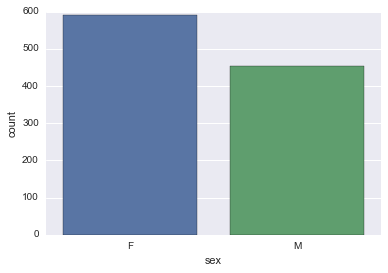

In [3]:
# distribution of sex variable [3a, 3b]
sns.countplot(x = 'sex', data=students)

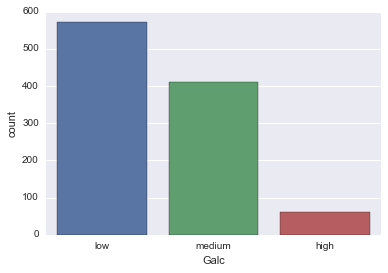

In [4]:
# distribution of Galc variable [3a, 3b]
sns.countplot(x = 'Galc', data=students)

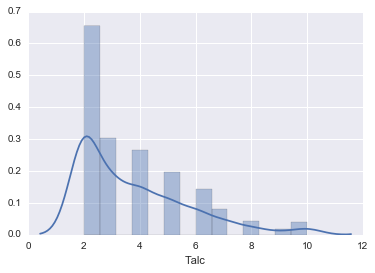

In [5]:
# univariate bar graph for Talc [3b]
sns.distplot(students['Talc'])

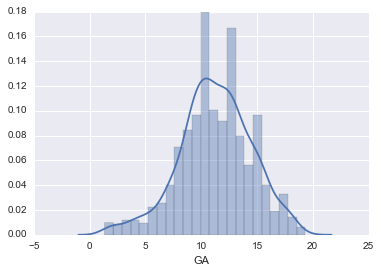

In [6]:
# univariate bar graph for GA [3b]
sns.distplot(students['GA'])

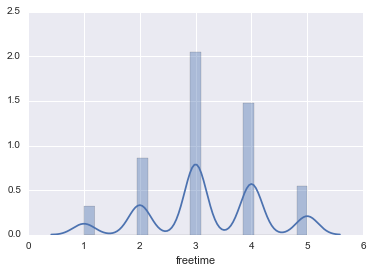

In [7]:
# univariate bar graph for GT [3b]
sns.distplot(students['freetime'])

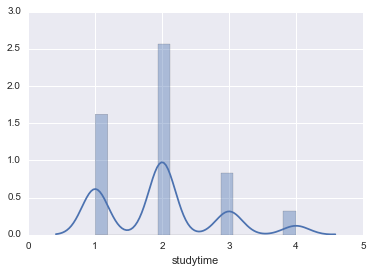

In [8]:
# univariate bar graph for GT [3b]
sns.distplot(students['studytime'])

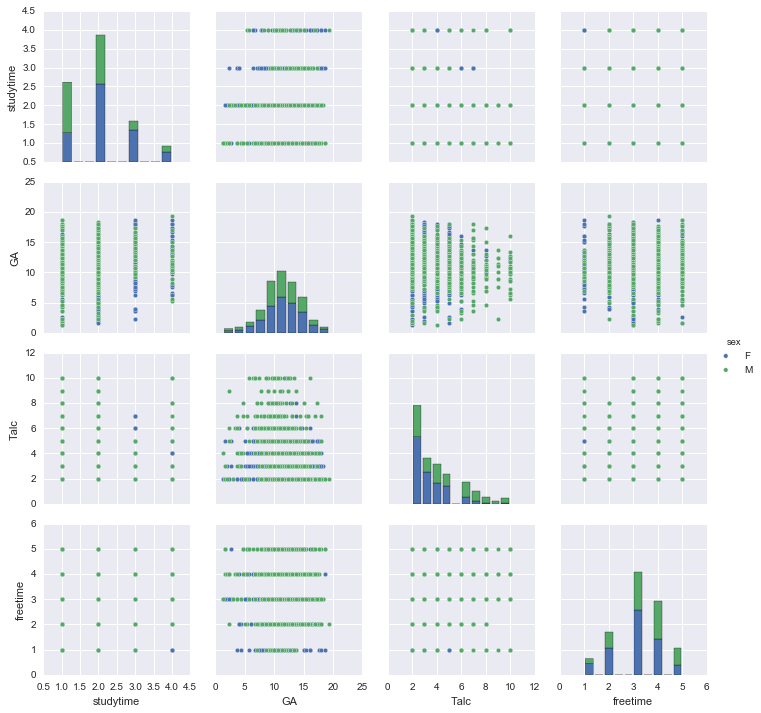

In [9]:
# Big picture of dataset (single bivariate plot for numerical variables and sex (category)) [3c, 3d]
# Galc and GG are not here since they are derived from Talc, GA
sns.pairplot(students, hue='sex');

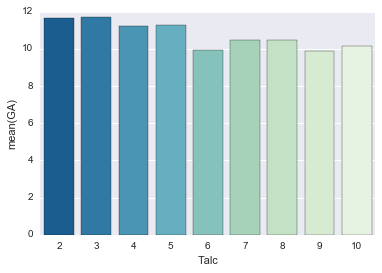

In [10]:
# ---- DATA ANALYSIS STARTS HERE ----
# Decrease of average grade for consumption as consumption increase is slightly visible in below plot.
sns.barplot(x='Talc', y='GA', data=students, ci=None, palette='GnBu_r')

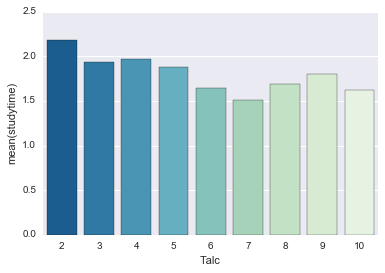

In [11]:
# students who drink less study little more
sns.barplot(x='Talc', y='studytime', data=students, ci=None, palette='GnBu_r')

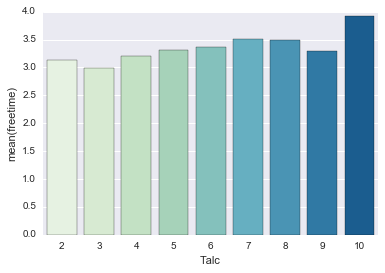

In [12]:
# Although they have more freetime, they'd prefer to spend this time in alcohol consumption,
# instead of studying, so the reason is not only inebriation effect of alcohol
# but also time that is being spend on consuming alcohol.
sns.barplot(x='Talc', y='freetime', data=students, ci=None, palette='GnBu')

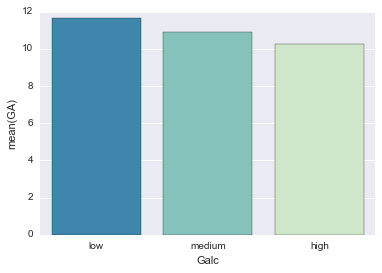

In [13]:
# The plot below shows that alcohol consumption level has counter effect on grades
# Although grade difference between low and high is only (about) 8% of maximum grade (20)
sns.barplot(x='Galc', y='GA', data=students, ci=None, palette='GnBu_r')

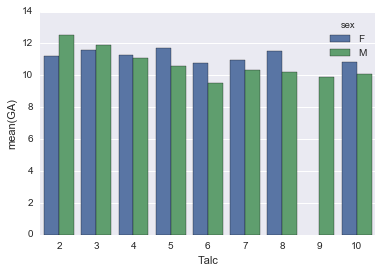

In [14]:
# However, alcohol consumption doesn't really affect success of female students.
sns.barplot(x='Talc', y='GA', data=students, hue='sex', ci=None);

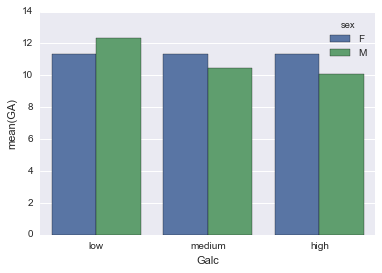

In [15]:
# When alcohol consumption level/degree (GALC) is used, it is more obvious that
# Alcohol consumption has no affect on female students
sns.barplot(x='Galc', y='GA', data=students, hue='sex', ci=None);

In [16]:
# FINAL: [3e]
# After analysis, it can be said that the hypothesis is partially true.
# It is only valid for male students and counter-effect is lower than expected.
# Also so the reason is not only inebriation effect (which is the only expected) of alcohol
# but also time that is being spend on consuming alcohol.

In [17]:
# MIDTERM-2
# Explonatory variable is Galc => Categorical data about alcohol consumption -> low, medium, high
# Response variable is GA => Average grade
# Intercept = where Galc is LOW
import statsmodels.formula.api as smf
model = smf.ols(formula='GA ~ C(Galc)', data=students)
ols_results = model.fit()
# OLS RESULTS
# P values seem good => they are less than 0.05, so correlation between explonatory and response variables!
# (despite of PR-squared is not great enough which means model is not fit enough
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GA   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.34
Date:                Thu, 05 May 2016   Prob (F-statistic):           3.59e-05
Time:                        11:26:04   Log-Likelihood:                -2691.1
No. Observations:                1044   AIC:                             5388.
Df Residuals:                    1041   BIC:                             5403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            11.6539      0.133     87.439      0.000        11.392    11.915
C(Galc)[T.medium]    -0.7771      0.206     -3.768      0.000        -1.182    -0.372
C(Galc)[T.high]      -1.4039      0.433     -3.243      0.001        -2.253    -0.554
==============================================================================
Omnibus:                       23.759   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.361
Skew:                          -0.341   Prob(JB):                     3.11e-06
Kurtosis:                       3.344   Cond. No.                         4.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.api as sm
sm.stats.anova_lm(ols_results) #Anova table

,df,sum_sq,mean_sq,F,PR(>F)
C(Galc),2.0,210.418410,105.209205,10.336434,0.000036
Residual,1041.0,10595.799023,10.178481,NaN,NaN


In [19]:
import statsmodels.stats.multicomp as multi 
multi_comp = multi.MultiComparison(students['GA'], students['Galc'])
tukey = multi_comp.tukeyhsd()
# POST-HOC TEST -> MultiComparison
# See here, for [high, medium] pair we failed to reject.
tukey.summary()

group1,group2,meandiff,lower,upper,reject
high,low,1.4039,0.3878,2.4199,True
high,medium,0.6267,-0.4082,1.6616,False
low,medium,-0.7771,-1.2612,-0.2931,True


In [21]:
# only for Men
model_men = smf.ols(formula='GA ~ C(Galc)', data=students[students.sex == 'M'])
ols_results_men = model_men.fit()
# as it was stated before, hypothesis is only valid for men students
# for men R is greater (still not enough though)
# for men all P values are 0
ols_results_men.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GA   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     21.59
Date:                Thu, 05 May 2016   Prob (F-statistic):           1.12e-09
Time:                        11:26:30   Log-Likelihood:                -1151.2
No. Observations:                 453   AIC:                             2308.
Df Residuals:                     450   BIC:                             2321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            12.3150      0.228     53.901      0.000        11.866    12.764
C(Galc)[T.medium]    -1.8609      0.309     -6.013      0.000        -2.469    -1.253
C(Galc)[T.high]      -2.2081      0.481     -4.590      0.000        -3.154    -1.263
==============================================================================
Omnibus:                       19.319   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.368
Skew:                          -0.397   Prob(JB):                     5.11e-06
Kurtosis:                       3.813   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""